# 3.3 Assignment – POS & NER Tags

This notebook will be demonstrating the following:

1. I will be using spaCy to analyze a short passage of text from song lyrics.
2. I will extract Part of Speech (POS) tags and Named Entity Recognition (NER).
3. I will visualize the POS tag counts in a bar chart.
4. I will answer reflection questions about what I found.

## Enviornment install for python-docx

In [83]:
!pip install python-docx

## Dataset

I am using a short passage of song lyrics (5–10 sentences).
The lyrics are stored in a Word document called `lyrics.docx` and loaded into Python
using a relative file path.

In [86]:
from docx import Document

# Load the Word document using a relative path
doc_file = Document("lyrics.docx")

# Combine all paragraphs into one text string
text = ""
for paragraph in doc_file.paragraphs:
    text += paragraph.text + " "

print("Text loaded successfully.")

Text loaded successfully.


## Setup spaCy

Import spaCy and libraries needed for counting POS tags and creating a bar chart.

In [89]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

## Load spaCy Model

Will load the English language model. If not installed, I will install this using the command in the following cell.

In [92]:
try:
    nlp = spacy.load("en_core_web_sm")
    print("spaCy model loaded successfully.")
except OSError:
    print("spaCy model not found. Run the install cell below.")

spaCy model loaded successfully.


## Install model

This cell will be run if the model is not found.

In [95]:
# Run:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 8.4 MB/s eta 0:00:02
     --------------------------------------  12.6/12.8 MB 41.5 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 36.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Process the Text

I will convert the text into a spaCy Doc object so, I can analyze it.

In [98]:
doc = nlp(text)
print("Number of tokens:", len(doc))

Number of tokens: 66


## POS Tagging (Token and POS)

Will print each token along with its POS tag to see how spaCy classifies each word.

In [101]:
for token in doc:
    print(f"{token.text:<15} {token.pos_}")

Eleanor         PROPN
Rigby           PROPN
picks           VERB
up              ADP
the             DET
rice            NOUN
in              ADP
the             DET
church          NOUN
where           SCONJ
a               DET
wedding         NOUN
has             AUX
been            AUX
.               PUNCT
Lives           VERB
in              ADP
a               DET
dream           NOUN
.               PUNCT
Waits           NOUN
at              ADP
the             DET
window          NOUN
,               PUNCT
wearing         VERB
the             DET
face            NOUN
that            PRON
she             PRON
keeps           VERB
in              ADP
a               DET
jar             NOUN
by              ADP
the             DET
door            NOUN
.               PUNCT
Who             PRON
is              AUX
it              PRON
for             ADP
?               PUNCT
All             DET
the             DET
lonely          ADJ
people          NOUN
.               PUNCT
Wher

## Count POS Tags

Will count how many times each POS tag appears in the song lyrics.

In [104]:
pos_counts = Counter()

for token in doc:
    if token.text.strip() != "":
        pos_counts[token.pos_] += 1

pos_counts

Counter({'DET': 12,
         'NOUN': 11,
         'PUNCT': 9,
         'ADP': 8,
         'PRON': 8,
         'VERB': 6,
         'AUX': 5,
         'SCONJ': 3,
         'PROPN': 2,
         'ADJ': 2})

## POS Tag Bar Chart

Here is the Visual of the POS tag counts presented in a bar chart.

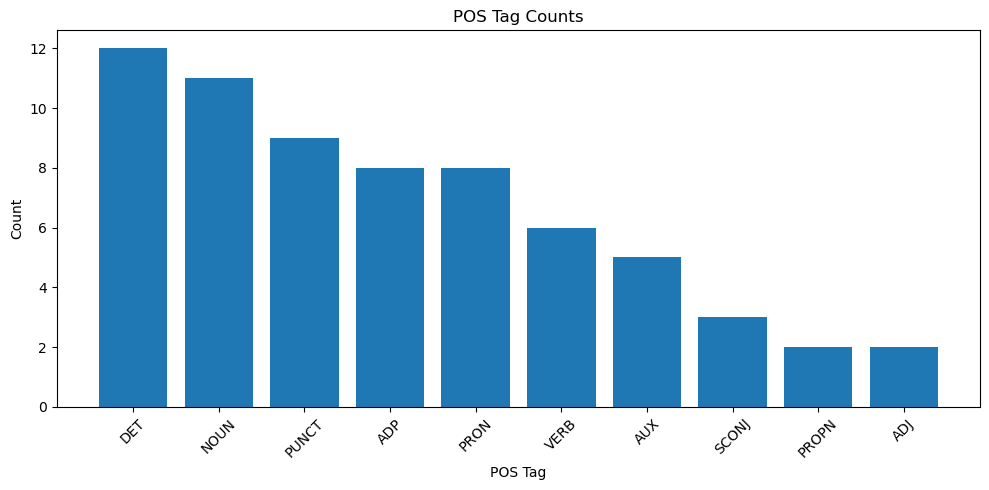

In [107]:
sorted_items = sorted(pos_counts.items(), key=lambda x: x[1], reverse=True)

labels = [item[0] for item in sorted_items]
values = [item[1] for item in sorted_items]

plt.figure(figsize=(10,5))
plt.bar(labels, values)
plt.title("POS Tag Counts")
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Named Entity Recognition (NER)

I will extract named entities from the text and print each entity and its label.

In [110]:
if len(doc.ents) == 0:
    print("No named entities were found.")
else:
    for ent in doc.ents:
        print(f"{ent.text:<25} {ent.label_}")

Eleanor Rigby             PERSON


## Reflection

My reflections based on the POS and NER output.

In [120]:
# Q1: What was the most common POS tag in your text?

# The most common POS tag in my text was DET (determiners).
# I noticed this makes sense because the lyrics use words like "the" and "a" a lot
# when talking about people and objects in the song.
# Since the song is mostly describing scenes and characters, these small words
# show up often before nouns throughout the passage.


# Q2: Did spaCy miss any NER entities? Why do you think that happened?

# spaCy only found one named entity in the text, which was "Eleanor Rigby" labeled as a PERSON.
# It did not find many others, because song lyrics are written in a more poetic and symbolic way
# instead of clearly naming places or organizations.
# Because of this, the model does not have enough clear information to label many words
# as named entities like it would in a news article or a more factual text.


# Q3: How might POS and NER be useful for real world NLP tasks (e.g., spam detection, search engines)?

# POS tagging helps a computer understand how sentences are put together by showing
# which words are nouns, verbs, and other parts of speech.
# This could be helpful for things like search engines or sorting text into categories.
# NER is useful because it can pull out important information such as names of people or places,
# which could help organize documents, improve search results, and make it easier to
# find key details in large amounts of text. This helped me understand how computers can break 
# down and understand human language step by step.